In [62]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [5]:
data = pd.read_csv(r"D:\assignment qns\1.Decision Tree\heart_disease.csv")
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0


In [6]:
data.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [8]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


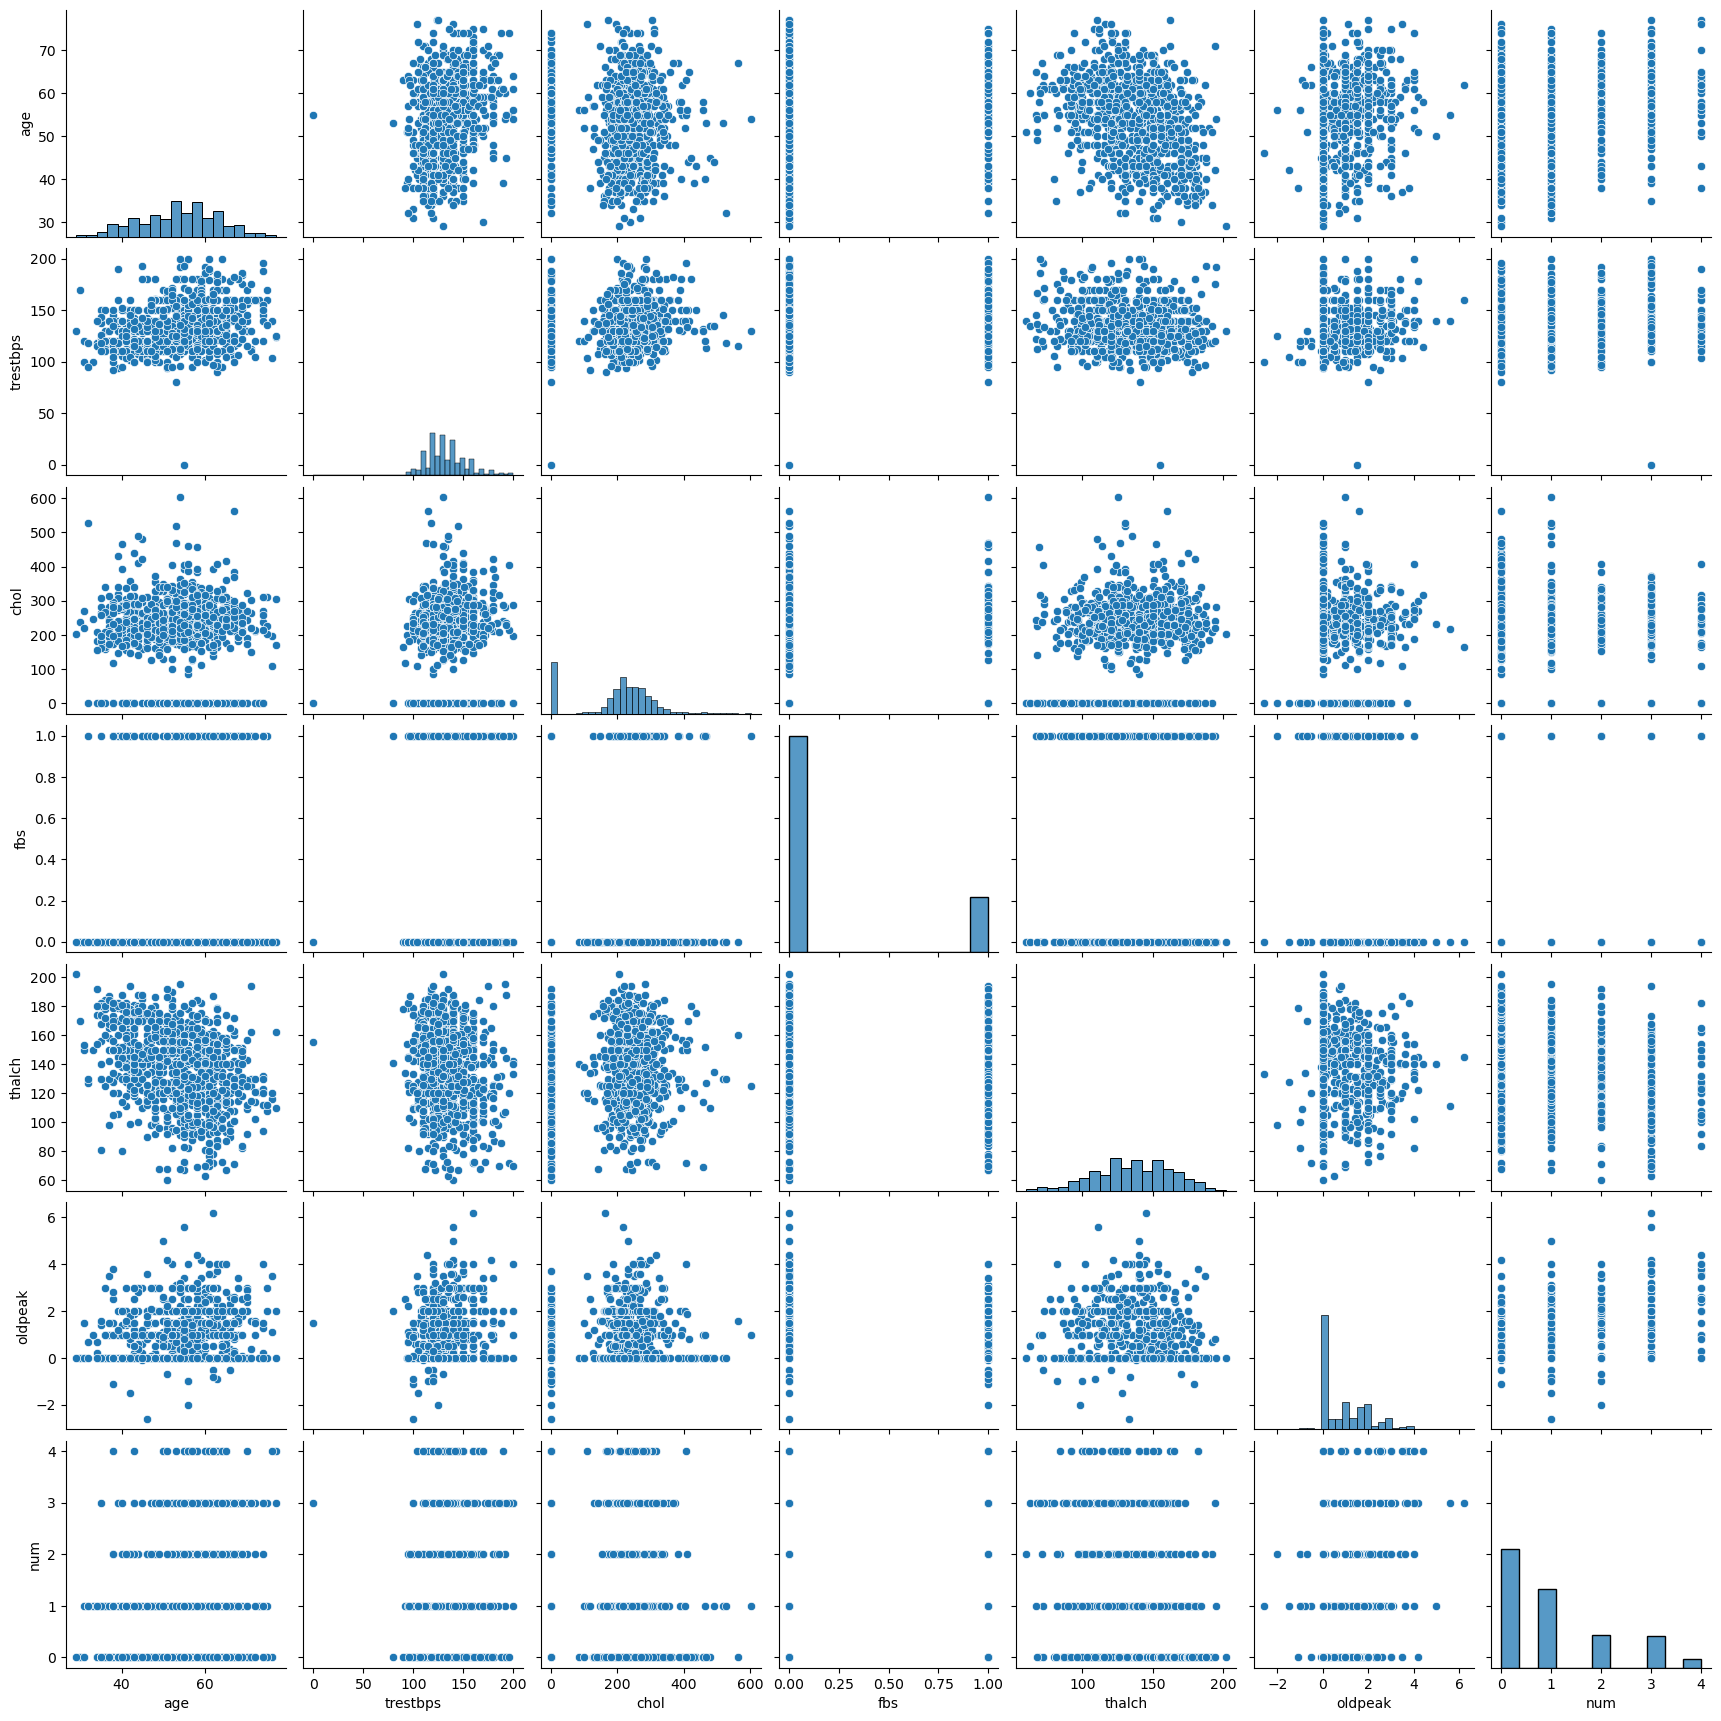

In [9]:
sns.pairplot(data)
plt.show()

In [11]:
data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [12]:
# Perform one-hot encoding for all categorical columns
data = pd.get_dummies(data)

In [15]:
data.columns

Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num',
       'sex_Female', 'sex_Male', 'cp_asymptomatic', 'cp_atypical angina',
       'cp_non-anginal', 'cp_typical angina', 'restecg_lv hypertrophy',
       'restecg_normal', 'restecg_st-t abnormality', 'exang_FALSE',
       'exang_TRUE', 'exang_TURE', 'slope_downsloping', 'slope_flat',
       'slope_upsloping', 'thal_fixed defect', 'thal_normal',
       'thal_reversable defect'],
      dtype='object')

In [32]:
data.isna().sum()

age                          0
trestbps                     0
chol                         0
fbs                          0
thalch                       0
oldpeak                     62
num                          0
sex_Female                   0
sex_Male                     0
cp_asymptomatic              0
cp_atypical angina           0
cp_non-anginal               0
cp_typical angina            0
restecg_lv hypertrophy       0
restecg_normal               0
restecg_st-t abnormality     0
exang_FALSE                  0
exang_TRUE                   0
exang_TURE                   0
slope_downsloping            0
slope_flat                   0
slope_upsloping              0
thal_fixed defect            0
thal_normal                  0
thal_reversable defect       0
dtype: int64

In [33]:
data.dropna(inplace = True)

In [63]:
# Split the dataset into features (X) and target (y)
X = data.drop('num', axis=1) 
y = data['num']  

In [64]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [37]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
y_pred_proba = dt_classifier.predict_proba(X_test)

In [53]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5470588235294118
Precision: 0.5564090734332949
Recall: 0.5470588235294118
F1 Score: 0.5317513368983957
ROC AUC Score: 0.6280444089883492


In [58]:
# Hyperparameter Tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 5, 10]})

In [59]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


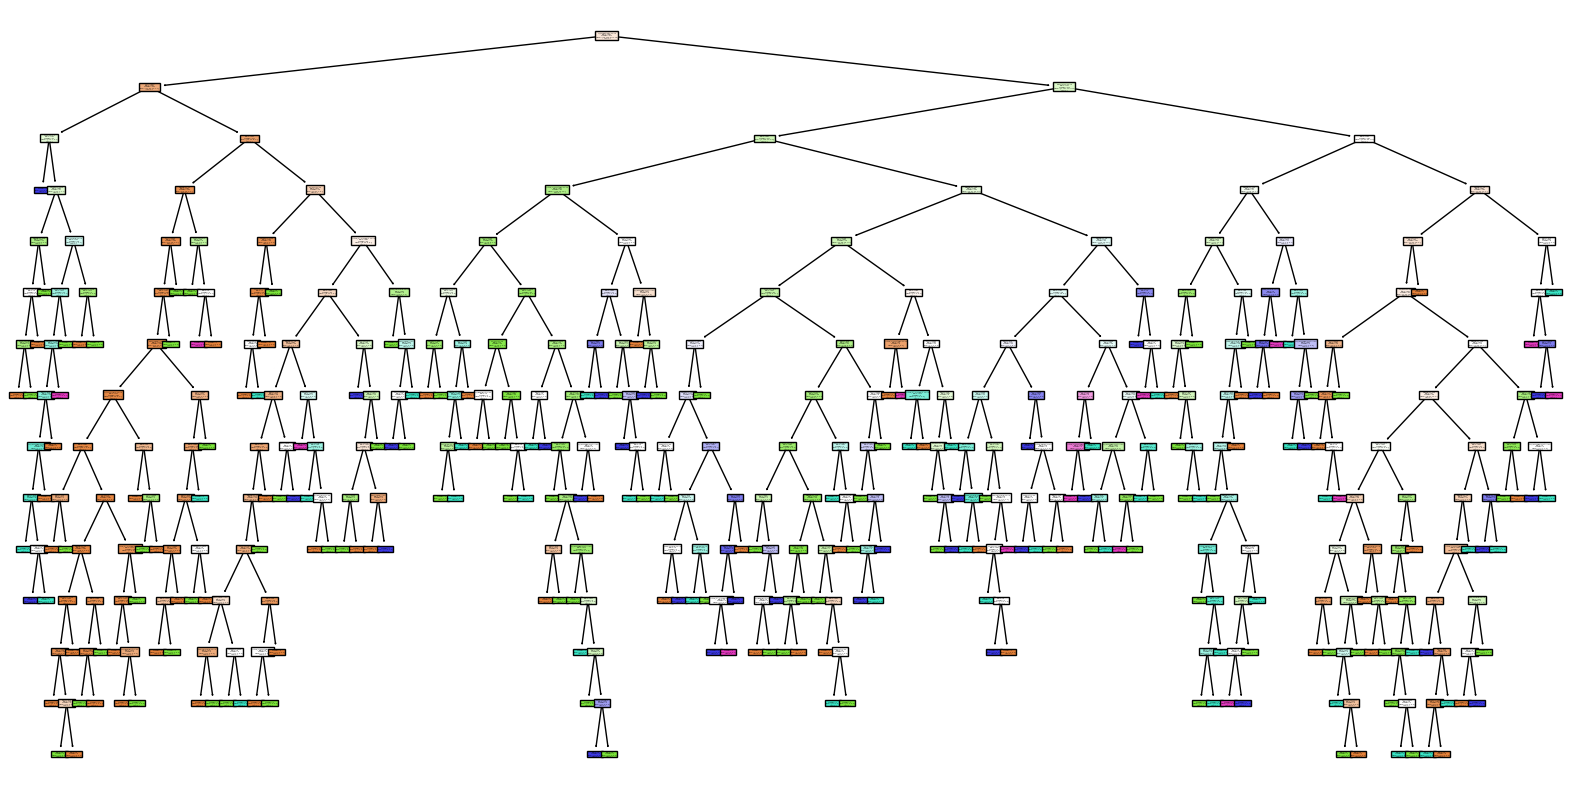

In [60]:
# Visualize Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['0', '1', '2', '3', '4'], filled=True)
plt.show()